### Figure of merit plots for HALO 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from scipy import interpolate

#### Figure settings

In [2]:
figsize = (8,6)
plt.rc('font', family='serif')
plt.rc('axes', labelsize='x-large')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('axes',titlesize='x-large')
#plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.1
#print(plt.rcParams.keys())

#### HALO 1 figure of merit data

In [3]:
#dist, eff, excl = np.genfromtxt('exclusions_halo1.txt',unpack=True,skip_header=1)
dist, dist_uncert, eff, excl = np.genfromtxt('exclusions_halo1.txt',unpack=True,skip_header=1)

### Dist uncert = 0.1 cross section

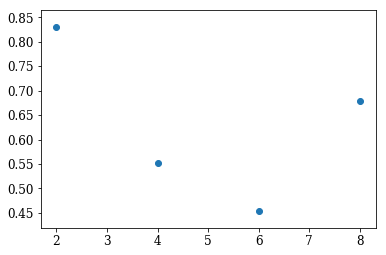

In [4]:
dist01 = []
excl01 = []
for i in range(len(dist_uncert)):
    if dist_uncert[i] == 0.1:
        dist01.append(dist[i])
        excl01.append(excl[i])
plt.scatter(dist01,excl01)
plt.show()
# Note, you can see a good downward trend until 6 kpc. At that point, stuff is messed up. 
# Some of is because it has trouble creating contours.

#### Extrapolation

In [5]:
# good data
dist01 = []
excl01 = []
for i in range(len(dist_uncert)):
    if dist_uncert[i] == 0.1 and dist[i] <= 6:
        dist01.append(dist[i])
        excl01.append(excl[i])

# linear fit and extrapolate
params = np.polyfit(dist01,excl01,1)
def f(x):
    return params[0]*x + params[1]
dist_extend = [8,10,12,14]
for d in dist_extend:
    dist01.append(d)
    excl01.append(f(d))

# clip negative values
excl01 = np.clip(excl01,0,1)

#### Fig of merit

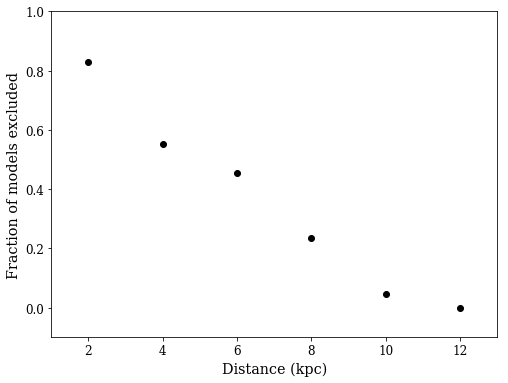

In [6]:
fig1,ax1 = plt.subplots(1,1,figsize=(8,6))
ax1.scatter(dist01,excl01,color='black')

ax1.set_xlim(1,13)
ax1.set_ylim(-0.1,1)
ax1.set_xlabel('Distance (kpc)')
ax1.set_ylabel('Fraction of models excluded')

plt.show()

### Figure of merit as a function of distance uncertainty

In [7]:
# Prepare data

# good data
dist2D = []
excl2D = []
du2D   = []
for i in range(len(dist)):
    if dist[i] <= 6:
        dist2D.append(dist[i])
        excl2D.append(excl[i])
        du2D.append(dist_uncert[i])

# linear fit and extrapolate
params = np.polyfit(dist2D,excl2D,1)
def f(x):
    return params[0]*x + params[1]
dist_extend = [8,10,12,14]
for i in range(len(dist_extend)):
    dist2D.append(dist_extend[i])
    excl2D.append(f(dist_extend[i]))
    du2D.append(du2D[i])

# clip negative values
excl2D = np.clip(excl2D,0,1)

# convert dist_uncert to percentage
du2D = [i*100 for i in du2D]

In [8]:
# Prepare the data

dist2D = []
excl2D = []
du2D   = []

du_list = [0,0.1,0.2,0.3,0.4,0.5]
for du in du_list:
    dist_ = []
    excl_ = []
    
    # get the good data for this dist uncert
    for i in range(len(dist_uncert)):
        if dist_uncert[i] == du and dist[i] <= 6:
            dist_.append(dist[i])
            excl_.append(excl[i])

    # linear fit and extrapolate
    params = np.polyfit(dist_,excl_,1)
    def f(x):
        return params[0]*x + params[1]
    dist_list = np.linspace(2,16)
    for d in dist_list:
        dist2D.append(d) #dist2D.append(d)
        excl2D.append(f(d)) #excl2D.append(f(d))
        du2D.append(du) #du2D.append(du)
        
# clip negative values
excl2D = np.clip(excl2D,0,1)

# convert dist_uncert to percentage
du2D = [i*100 for i in du2D]

In [9]:
# interpolate

x = np.linspace(np.min(dist2D),np.max(dist2D))
y = np.linspace(np.min(du2D),np.max(du2D))
x,y = np.meshgrid(x,y)

z = interpolate.griddata((dist2D,du2D),excl2D,(x.ravel(),y.ravel()))
        
z = z.reshape(x.shape)

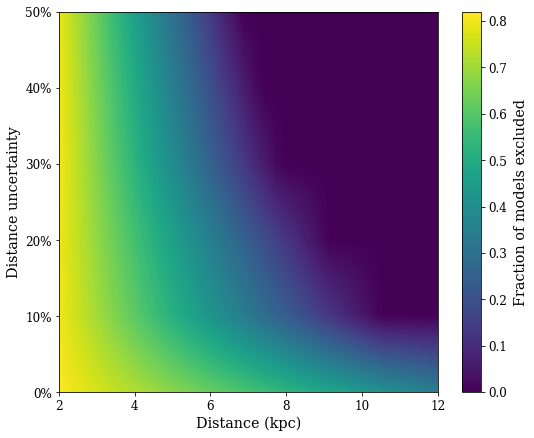

In [17]:
# Contour plot        
fig2,ax2 = plt.subplots(1,1,figsize=(8.5,7))
cont = ax2.contourf(x,y,z,np.linspace(-0.001,0.82,300))
cbar = fig2.colorbar(cont,ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

ax2.set_xlim(2,12)
ax2.set_xlabel('Distance (kpc)')
ax2.yaxis.set_major_formatter(StrMethodFormatter(u"{x:.0f}%"))
ax2.set_ylabel('Distance uncertainty')
cbar.ax.set_ylabel('Fraction of models excluded',labelpad=7)

fig2.savefig('figure_of_merit_halo1.png')

plt.show()